<h1>PAIRS TRADING RESEARCH</h1>

<h4>The porpouse of this repository is to research and find the best currencies for pairs trading based on a given historical data</h4>
<quote><i>*If you don't know Pairs Trading yet, please check my Github profile...</i></quote>  <a href=https://github.com/Algo-Tradings> Click Here </a>

<quote><i>**Each process in this research saves an output file. That way you could use it as you wish, or even in another repos of myself.</i></quote>

<h3>1. Run Once </h3> 
install necessary packages.
After that, you need comment the above part of code

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install python-binance
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install matplotlib

<h3>2. Imports </h3>
get classes of this system

In [2]:
%matplotlib inline
import pandas as pd

from research import Loader
from research import Cleaner
from research import Correlation
from research import Cointegration
from research import Ratio

<h3>3. Historical Data </h3> 
Select the desired timeframe and interval.

In [3]:

hist_df = pd.read_csv('./data/raw/historical_data.csv', header=[0, 1], index_col=0)
# hist_df = Loader().get_historical_data(timeframe='1d', interval='1 year ago') # Uncomment To get new data (it takes sometime)
hist_df

BTCUSDT                                ETHUSDT                    \
                Open      High       Low     Close     Open     High      Low   
Time                                                                            
2022-04-19  40801.13  41760.00  40571.00  41493.18  3055.56  3131.00  3030.34   
2022-04-20  41493.19  42199.00  40820.00  41358.19  3101.74  3166.50  3036.45   
2022-04-21  41358.19  42976.00  39751.00  40480.01  3076.03  3180.00  2942.31   
2022-04-22  40480.01  40795.06  39177.00  39709.18  2983.57  3034.32  2930.35   
2022-04-23  39709.19  39980.00  39285.00  39441.60  2962.39  2978.03  2913.89   
...              ...       ...       ...       ...      ...      ...      ...   
2023-04-14  30373.84  31000.00  29966.00  30466.93  2012.00  2128.76  2009.22   
2023-04-15  30466.93  30595.60  30202.00  30295.09  2099.99  2111.85  2071.13   
2023-04-16  30295.10  30549.99  30120.00  30304.65  2090.61  2141.54  2072.72   
2023-04-17  30304.66  30316.06  29240.65  29430.27  2118.66  2120.51  2056.25   
2023-04-18  29430.27  30485.00  29096.78  30175.01  2073.99  2125.00  2051.00   

                    NEOUSDT         ...   IDUSDT          LOOMUSDT           \
              Close    Open   High  ...      Low    Close     Open     High   
Time                                ...                                       
2022-04-19  3101.77   21.30  22.14  ...      NaN      NaN      NaN      NaN   
2022-04-20  3076.04   22.10  22.19  ...      NaN      NaN      NaN      NaN   
2022-04-21  2983.58   21.49  22.62  ...      NaN      NaN      NaN      NaN   
2022-04-22  2962.39   20.82  21.37  ...      NaN      NaN      NaN      NaN   
2022-04-23  2933.03   21.10  21.43  ...      NaN      NaN      NaN      NaN   
...             ...     ...    ...  ...      ...      ...      ...      ...   
2023-04-14  2099.99   12.47  13.09  ...  0.57244  0.80162  0.06513  0.06619   
2023-04-15  2090.60   12.96  13.11  ...  0.75700  0.82895  0.06599  0.07000   
2023-04-16  2118.67   12.96  14.20  ...  0.80044  0.92936  0.06654  0.06747   
2023-04-17  2074.00   13.58  13.73  ...  0.82520  0.93520  0.06689  0.06690   
2023-04-18  2090.16   12.92  13.22  ...  0.87654  0.92673  0.06532  0.06790   

                             OAXUSDT                          
                Low    Close    Open    High     Low   Close  
Time                                                          
2022-04-19      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-20      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-21      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-22      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-23      NaN      NaN     NaN     NaN     NaN     NaN  
...             ...      ...     ...     ...     ...     ...  
2023-04-14  0.06452  0.06597  0.2623  0.2741  0.2503  0.2631  
2023-04-15  0.06580  0.06664  0.2633  0.3583  0.2563  0.3271  
2023-04-16  0.06531  0.06683  0.3271  0.5377  0.3200  0.4210  
2023-04-17  0.06491  0.06527  0.4213  0.4555  0.3570  0.3738  
2023-04-18  0.06532  0.06634  0.3738  0.4160  0.3622  0.3712  

[365 rows x 1172 columns]

<h3>4. Cleaning Data </h3> 

In [4]:
cleared_df = Cleaner().get_cleared_data(hist_df)
cleared_df

,BTCUSDT,ETHUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,IOTAUSDT,XLMUSDT,...,ACAUSDT,XNOUSDT,WOOUSDT,ALPINEUSDT,ASTRUSDT,KDAUSDT,APEUSDT,BSWUSDT,BIFIUSDT,MULTIUSDT
Time,,,,,,,,,,,,,,,,,,,,,
2022-04-19,41493.18,3101.77,22.10,113.80,6.825,0.9520,0.7749,2.646,0.6867,0.2039,...,1.5180,2.141,0.5010,5.4567,0.2195,5.486,13.3739,1.2039,1493.1,12.46
2022-04-20,41358.19,3076.04,21.51,111.90,6.767,0.9370,0.7517,2.764,0.6777,0.2002,...,1.4640,2.115,0.4736,5.8153,0.2138,5.397,16.7269,1.2101,1514.3,13.13
2022-04-21,40480.01,2983.58,20.82,106.80,6.527,0.9100,0.7328,2.505,0.6632,0.1966,...,1.4690,2.042,0.4467,7.2187,0.2118,5.203,14.2885,1.1373,1494.9,11.97
2022-04-22,39709.18,2962.39,21.10,105.40,6.594,0.9060,0.7179,2.457,0.6736,0.1953,...,1.4120,2.054,0.4518,6.0004,0.2060,5.144,15.3693,1.1353,1449.7,11.63
2022-04-23,39441.60,2933.03,20.92,105.10,6.453,0.8860,0.7057,2.404,0.6813,0.1914,...,1.3300,2.071,0.4427,5.9051,0.1911,4.942,16.6921,1.1582,1418.4,11.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,30466.93,2099.99,12.97,96.33,3.331,0.4381,0.5227,1.249,0.2273,0.1069,...,0.1032,0.918,0.3049,3.8629,0.0731,1.011,4.5650,0.1883,518.0,11.35
2023-04-15,30295.09,2090.60,12.96,96.68,3.341,0.4522,0.5192,1.242,0.2251,0.1064,...,0.1023,0.913,0.3321,3.7514,0.0742,1.090,4.5430,0.1894,520.5,11.52
2023-04-16,30304.65,2118.67,13.58,100.01,3.415,0.4513,0.5209,1.238,0.2289,0.1073,...,0.1042,0.948,0.3216,3.7225,0.0738,1.057,4.5280,0.1921,518.9,11.22


<h3>5. Correlated Currencies </h3>
Describe the minimum correlation rate that you expect

In [5]:
corr_df = Correlation().get_log_correlation(cleared_df, min_correlation=0.83)
corr_df

,Currency1,Currency2,Correlation
0,BTCUSDT,ETHUSDT,0.888214
1,BTCUSDT,FUNUSDT,0.844633
2,BTCUSDT,RUNEUSDT,0.837767
3,BTCUSDT,GNOUSDT,0.848518
4,ETHUSDT,FUNUSDT,0.872166
...,...,...,...
62,ALICEUSDT,BAKEUSDT,0.846098
63,TLMUSDT,BAKEUSDT,0.845842
64,TLMUSDT,SLPUSDT,0.851307
65,WAXPUSDT,POWRUSDT,0.864895


<h3>6. Cointegrated Currencies </h3>

In [6]:
coint_df = Cointegration().get_cointegration(corr_df, cleared_df)
coint_df

,Currency1,Currency2,Correlation,Cointegration,Criticals
22,IOTAUSDT,ZENUSDT,0.832614,-4.588827,-3.926781
28,THETAUSDT,ALICEUSDT,0.851472,-4.122999,-3.926781
35,ENJUSDT,WAXPUSDT,0.845421,-5.494797,-3.926781
42,IOTXUSDT,ALICEUSDT,0.843329,-4.080225,-3.926781
43,IOTXUSDT,TLMUSDT,0.836614,-4.805518,-3.926781
46,STMXUSDT,WAXPUSDT,0.838636,-5.665531,-3.926781
48,COMPUSDT,AAVEUSDT,0.833416,-4.105769,-3.926781
50,MANAUSDT,SANDUSDT,0.891437,-4.168073,-3.926781
53,RUNEUSDT,UNIUSDT,0.843924,-4.931384,-3.926781


<h3>7.Final Result</h3>
Shows a list of pairs that is potencially profitable and its ratio

In [7]:
researched_df = Ratio().get_ratio(coint_df, cleared_df)
researched_df

,Currency1,Currency2,Correlation,Cointegration,Criticals,Ratio
50,MANAUSDT,SANDUSDT,0.891437,-4.168073,-3.926781,0.865420
28,THETAUSDT,ALICEUSDT,0.851472,-4.122999,-3.926781,0.620324
35,ENJUSDT,WAXPUSDT,0.845421,-5.494797,-3.926781,5.520958
53,RUNEUSDT,UNIUSDT,0.843924,-4.931384,-3.926781,0.275689
42,IOTXUSDT,ALICEUSDT,0.843329,-4.080225,-3.926781,0.015930
46,STMXUSDT,WAXPUSDT,0.838636,-5.665531,-3.926781,0.082814
43,IOTXUSDT,TLMUSDT,0.836614,-4.805518,-3.926781,1.251316
48,COMPUSDT,AAVEUSDT,0.833416,-4.105769,-3.926781,0.625436
22,IOTAUSDT,ZENUSDT,0.832614,-4.588827,-3.926781,0.019034


<h3>8. Visualization</h3>
Minimalist because that is not the porpuse of this research notebook

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Linear Cointegration Between Two Currencies Above

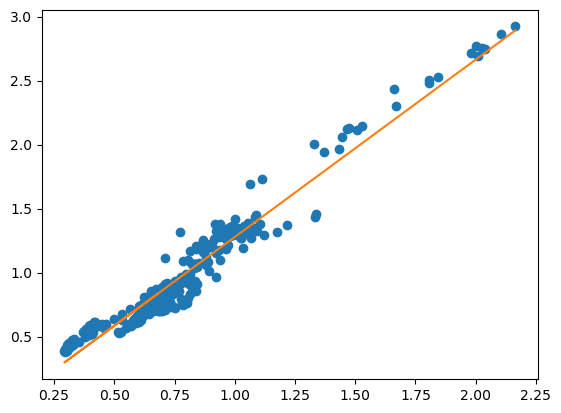

In [9]:
x=cleared_df['MANAUSDT']
y=cleared_df['SANDUSDT']

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

Correlation of same currencies over the time

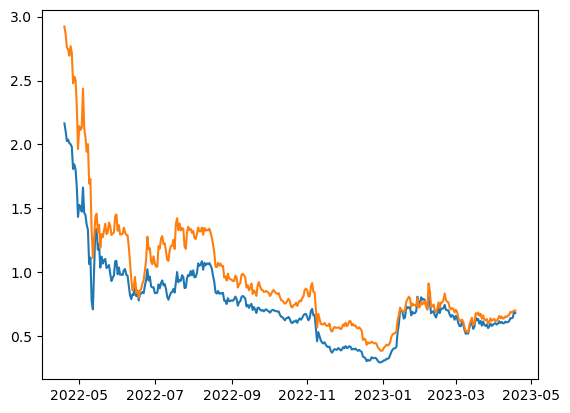

In [10]:
plt.plot(cleared_df.index, x)
plt.plot(cleared_df.index, y)
plt.show()

<h3>9. Considerations</h3>
In this research we clearly saw that some currencies are higly correlated and cointegrated. That way using pairs trading strategy, we have a huge potencial to make consistent profits with them.

<i>If you want full usage of this research, kindly consider visit my others pairs-trading repos.
For that strategy I have a backtester, a dashboard and also a 100% autonomous bot</i>


<h3>Thank you for your time!</h3>